['еще б кто-нибудь за пивом сходил', 'типа японское пиво', 'пошёл я тогда за пивом', 'так наоборот надо пивка холодненького', 'по вечерам кровать меня превращает в пивозавра, а утром ванна - в человека', 'С пивом', 'Не, ты в офис ездишь, за пивом ходишь, на проставления в рестораны и бары катаешь', 'я за пивом не хожу 😂 мне его приносят', 'нет пива', 'Сделай скриншот и узнай, какое пиво тебе подходит по мнению астрального пивного сомелье', 'старость, это когда выпиваешь вечером бутылочку пива, а утром похмелье(', 'нужна будет текила, пиво и чили', 'Мы с тобой значит пиво будем пить и готовить', 'корректировка: мы с тобой будем пить пиво и ты готовить 😂', 'И заболела, пока шла в магаз за пивом elgatskova', 'про алко:\n\nтак как я на машине, могу цепануть ящик пивка, ящик минералки', 'Есть ли смысл вставать ради последней бутылки пива?', 'Пиво пиво', 'Флоу пятничного пивопития', 'свежего пива принёс?']
Количество сообщений содержащих упоминание пива по времени суток
Утро: 20
День: 52
Веч

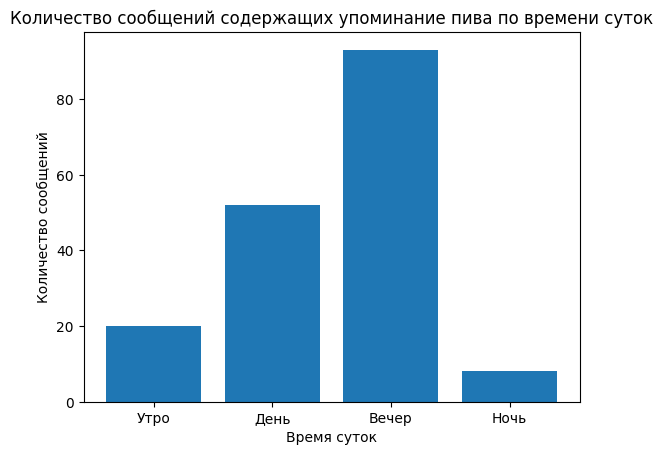

In [8]:
import json
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

# Открываем наш файл JSON
with open('/Users/mikhail/Desktop/Code/work_with_chat_final/result_full.json', 'r') as f:
    data = json.load(f)

# Описываем в RegExp слово, которое будем искать
pattern = re.compile(r'\s[Пп]ив[нкчоаы]', re.IGNORECASE)

# Создаем переменные для временных периодов
morning_period = list(range(4, 12))  # с 4:00 до 12:00
day_period = list(range(12, 17))  # с 12:00 до 17:00
evening_period = range(17, 24)  # с 17:00 до 00:00
night_period = list(range(0, 5))  # с 00:00 до 5:00

# Ищем сообщения, которые содержат искомое слово и разделяем их по времени суток
morning_messages = []
day_messages = []
evening_messages = []
night_messages = []

for message in data['messages']:
    if 'text' in message:
        # Проверяем не принадлежит ли наше сообщение к классу "список"
        if isinstance(message['text'], list):
            # Если сообщение список - собираем в строку
            text = ' '.join(str(x) for x in message['text'])
        else:
            # Если нет - присваеваем как есть
            text = message['text']
        # Сравниваем результат с паттерном и присваеваем переменной match в случае совпадения
        match = pattern.search(text)
        # Если нашлось совпадение - определяем в какой промежуток времени написано сообщение
        if match:
            # Выделяем часы из времени сообщения
            date_string = message['date']
            date = datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S')
            hour = date.hour

            # Если сообщение принадлежит к временному промежутку - добавляем его в список
            # Добавляем целиком, что бы можно было вывести сообщения при необходимости
            if hour in morning_period:
                morning_messages.append(message['text'])
            elif hour in day_period:
                day_messages.append(message['text'])
            elif hour in evening_period:
                evening_messages.append(message['text'])
            elif hour in night_period:
                night_messages.append(message['text'])

# Выводим колличество сообщений для каждого времени суток
print("Количество сообщений содержащих упоминание пива по времени суток")
print("Утро:", len(morning_messages))
print("День:", len(day_messages))
print("Вечер:", len(evening_messages))
print("Ночь:", len(night_messages))

labels = ['Утро', 'День', 'Вечер', 'Ночь']
values = [len(morning_messages), len(day_messages),
          len(evening_messages), len(night_messages)]

# Создаем диаграмму, в которой визуализируем частоту сообщений по времени суток
plt.bar(labels, values)
plt.title('Количество сообщений содержащих упоминание пива по времени суток')
plt.xlabel('Время суток')
plt.ylabel('Количество сообщений')
plt.show()